In [2]:
import pandas as pd

In [34]:
import numpy as np

In [62]:
from PIL import Image

In [59]:
from scipy.misc import toimage
import matplotlib.pyplot as plt
%matplotlib inline

In [108]:
from keras.utils import np_utils

In [119]:
from keras.models import Sequential

In [118]:
from keras import layers

In [16]:
from keras.datasets import mnist,cifar10

In [98]:
df = pd.read_csv('sign-language/sign_mnist_train.csv')

In [99]:
df_test = pd.read_csv('sign-language/sign_mnist_test.csv')

In [8]:
df.shape

(27455, 785)

In [31]:
image_width, image_height = 28,28

In [100]:
x_train = df.iloc[:,1:].values
x_test = df_test.iloc[:,1:].values

In [101]:
x_train = x_train.reshape(x_train.shape[0], image_height, image_width, 1)
x_test = x_test.reshape(x_test.shape[0], image_height, image_width, 1)

In [104]:
y_train = df['label'].values
y_test = df_test['label'].values

In [135]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [137]:
x_train /= 255
x_test /= 255

In [92]:
etichette = set(y_train)

In [110]:
print(etichette)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24}


In [111]:
#non esiste la classe 9 ma ci saranno comunque 25 elementi
y_train = np_utils.to_categorical(y_train,25)
y_test = np_utils.to_categorical(y_test,25)

C:\Users\alfre\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  This is separate from the ipykernel package so we can avoid doing imports until


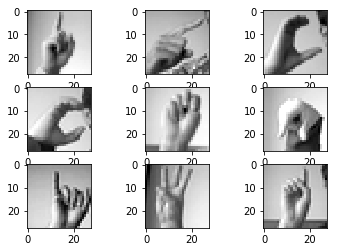

In [96]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(toimage(x_train[i, :, :, 0]))

In [120]:
# Costruisco il modello convoluzionale
model = Sequential()

In [121]:
model.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu', input_shape = (image_height, image_width, 1)))

Instructions for updating:
Colocations handled automatically by placer.


In [122]:
model.add(layers.MaxPooling2D(pool_size=(2,2)))

In [123]:
model.add(layers.Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))

In [124]:
model.add(layers.MaxPooling2D(pool_size=(2,2)))

In [125]:
model.add(layers.Dropout(0.5))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [126]:
model.add(layers.Flatten())

In [127]:
model.add(layers.Dense(128, activation='relu'))

In [128]:
model.add(layers.Dropout(0.5))

In [129]:
model.add(layers.Dense(25, activation='softmax'))

In [130]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [131]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
__________

In [139]:
model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

Train on 21964 samples, validate on 5491 samples
Epoch 1/10
21964/21964 [==============================] - 81s 4ms/step - loss: 2.8508 - acc: 0.1598 - val_loss: 1.4682 - val_acc: 0.6440
Epoch 2/10
21964/21964 [==============================] - 96s 4ms/step - loss: 1.4406 - acc: 0.5311 - val_loss: 0.6145 - val_acc: 0.8543
Epoch 3/10
21964/21964 [==============================] - 80s 4ms/step - loss: 0.9564 - acc: 0.6751 - val_loss: 0.3836 - val_acc: 0.9157
Epoch 4/10
21964/21964 [==============================] - 79s 4ms/step - loss: 0.7207 - acc: 0.7524 - val_loss: 0.2377 - val_acc: 0.9577
Epoch 5/10
21964/21964 [==============================] - 79s 4ms/step - loss: 0.5802 - acc: 0.7986 - val_loss: 0.1719 - val_acc: 0.9747
Epoch 6/10
21964/21964 [==============================] - 79s 4ms/step - loss: 0.4748 - acc: 0.8338 - val_loss: 0.1093 - val_acc: 0.9862
Epoch 7/10
21964/21964 [==============================] - 83s 4ms/step - loss: 0.4044 - acc: 0.8599 - val_loss: 0.0901 - val_acc:

In [140]:
model.evaluate(x_test, y_test, verbose=1)

7172/7172 [==============================] - 8s 1ms/step


[0.20584421921926574, 0.9311210262130507]

In [141]:
model.save('sign-language/sign_language_model.h5')